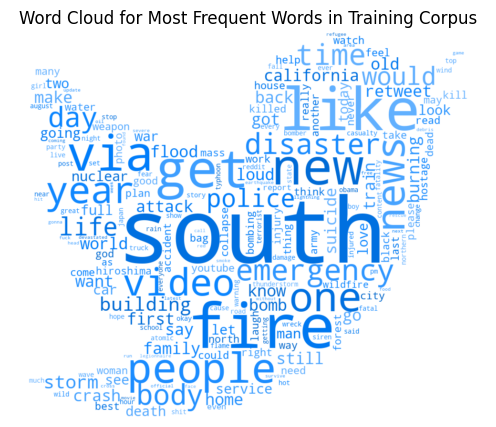

In [4]:
#https://pub.towardsai.net/unsupervised-sentiment-analysis-with-real-world-data-500-000-tweets-on-elon-musk-3f0653135558
#https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
# Flatten the text data from the training dataset, excluding the first column
train_corpus_path = 'C:/Users/riare/Downloads/Train Corpus.csv'  
train_corpus_df = pd.read_csv(train_corpus_path)

flattened_text = train_corpus_df.iloc[:, 1:].fillna('').astype(str).values.flatten()
def blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(40, 70)
mask=np.array(Image.open("C:/Users/riare/OneDrive/Desktop/Sem 2 Assignments/AIT 614/3aSXa.png"))
# Count the frequency of each word
word_counts = Counter(flattened_text)
# Get the 25 most common words and their counts
most_common_25 = dict(word_counts.most_common(600))

# Generate a word cloud for the 25 most common words
wordcloud_25_most_common = WordCloud(width=800, height=400, background_color='white',color_func=blue_color_func,mask=mask).generate_from_frequencies(most_common_25)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_25_most_common, interpolation='bilinear')
plt.title('Word Cloud for Most Frequent Words in Training Corpus')
plt.axis('off')
plt.show()


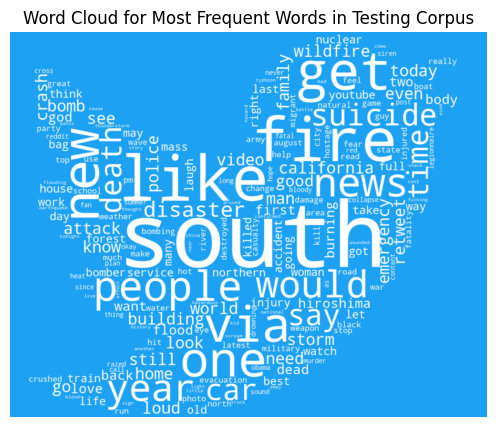

In [2]:
import random
test_corpus_path = "C:/Users/riare/Downloads/Test Corpus.csv"  
# Flatten the text data from the training dataset, excluding the first column
test_corpus_df = pd.read_csv(test_corpus_path)

flattened_text = test_corpus_df.iloc[:, 1:].fillna('').astype(str).values.flatten()
def white_color_func(*args, **kwargs):
    return "white"

# Count the frequency of each word
word_counts = Counter(flattened_text)
# Get the 25 most common words and their counts
most_common_25 = dict(word_counts.most_common(600))

# Generate a word cloud for the 500 most common words
wordcloud_25_most_common = WordCloud(width=800, height=400, background_color='#1DA1F2',color_func=white_color_func,mask=mask).generate_from_frequencies(most_common_25)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_25_most_common, interpolation='bilinear')
plt.title('Word Cloud for Most Frequent Words in Testing Corpus')
plt.axis('off')
plt.show()


In [5]:
import pandas as pd
import re

# A regular expression pattern that matches 'usa', 'us', 'united states' in a case-insensitive manner
df = pd.read_csv("C:/Users/riare/Downloads/CLEAN_train.csv")
usa_variants_regex = r'\b(USA|U\.?S\.?A\.?|U\.?S\.?|United States|America)\b'

# Replace any occurrence of the regex pattern with 'United States of America'
df['location'] = df['location'].str.replace(usa_variants_regex, 'United States of America', flags=re.IGNORECASE, regex=True)



In [7]:
countries_list = [
    "United States of America", "Canada", "United Kingdom", "Australia", "India", "Kenya", 
    "France", "Germany", "Italy", "Spain", "Brazil", "China", "Japan", "Mexico", 
    "Russia", "South Africa", "Egypt", "South Korea", "Sri Lanka", "Pakistan",
    "Argentina", "Chile", "Belgium", "Netherlands", "Norway", "Sweden", "Finland",
    "Poland", "Ukraine", "Greece", "Turkey", "Saudi Arabia", "Iran", "Iraq", 
    "Indonesia", "Malaysia", "Vietnam", "Thailand", "Philippines", "New Zealand",
    "Cuba", "Colombia", "Peru", "Venezuela", "Bangladesh", "Nigeria", "Ethiopia",
    "Ghana", "Morocco", "Algeria", "Tunisia", "Libya", "Jordan", "Israel", "Lebanon",
    "Portugal", "Ireland", "Austria", "Switzerland", "Denmark", "Hungary", "Romania",
    "Bulgaria", "Czech Republic", "Slovakia", "Slovenia", "Croatia", "Bosnia and Herzegovina",
    "Serbia", "Montenegro", "Kosovo", "Albania", "Macedonia", "Latvia", "Lithuania", "Estonia",
    "Belarus", "Cyprus", "Luxembourg", "Malta", "Iceland", "Fiji", "Papua New Guinea",
    "Solomon Islands", "Vanuatu", "Samoa", "Kiribati", "Micronesia", "Tonga", "Marshall Islands",
    "Palau", "Tuvalu", "Nauru", "Qatar", "United Arab Emirates", "Bahrain", "Oman", "Yemen",
    "Syria", "Afghanistan", "Uzbekistan", "Kazakhstan", "Kyrgyzstan", "Tajikistan", "Turkmenistan",
    "Georgia", "Armenia", "Azerbaijan", "Moldova", "Monaco", "San Marino", "Vatican City",
    "Andorra", "Liechtenstein", "Bhutan", "Maldives", "Nepal", "Myanmar", "Cambodia", "Laos",
    "Singapore", "Brunei", "Zimbabwe", "Mozambique", "Zambia", "Malawi", "Angola", "Namibia",
    "Botswana", "Lesotho", "Swaziland", "Madagascar", "Comoros", "Mauritius", "Seychelles",
    "Djibouti", "Somalia", "Kenya", "Uganda", "Rwanda", "Burundi", "Tanzania", "South Sudan",
    "Sudan", "Chad", "Niger", "Mali", "Mauritania", "Senegal", "The Gambia", "Guinea-Bissau",
    "Guinea", "Sierra Leone", "Liberia", "Ivory Coast", "Ghana", "Togo", "Benin", "Burkina Faso",
    "Cameroon", "Central African Republic", "Cabo Verde", "Sao Tome and Principe", "Equatorial Guinea",
    "Gabon", "Congo (Brazzaville)", "Congo (Kinshasa)", "Uganda", "Eritrea", "South Sudan"
]
import pandas as pd

# Function to attempt to extract a country from the location string
def extract_country(location, countries_list):
    for country in countries_list:
        if country.lower() in str(location).lower():
            return country
    return None

df['extracted_country'] = df['location'].apply(lambda loc: extract_country(loc, countries_list))

# Check the distribution of extracted countries
country_counts = df['extracted_country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']
print(country_counts)


                     country  count
0   United States of America    415
1                     Canada    104
2                      India     78
3                  Australia     78
4                    Nigeria     62
..                       ...    ...
78                     Niger      1
79               Afghanistan      1
80                   Lebanon      1
81                     Syria      1
82                    Poland      1

[83 rows x 2 columns]


In [8]:
#https://realpython.com/python-folium-web-maps-from-data/
import folium
import pandas as pd


# Load GeoJSON data
geo_json_data = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'


# Initialize the map centered around the world
m = folium.Map(location=[0, 0], zoom_start=2)

# Add the choropleth layer to the map
folium.Choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=country_counts,
    columns=['country', 'count'],
    key_on='feature.properties.name',  
    fill_color='YlGnBu',  
    nan_fill_color='lightgray',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Tweet Occurrences by Country'
).add_to(m)

# Add layer control to toggle the choropleth
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('C:/Users/riare/Downloads/interactive_world_map.html')  # Update with your desired save location

m
